In [30]:
import re
import os
import time
import random
import numpy as np
from pandas import Series
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
from fbprophet import Prophet
import itertools
import warnings
warnings.filterwarnings('ignore')

In [31]:
from fbprophet import Prophet

In [178]:
explore=pd.read_csv('daily09-19',index_col='date')
explore.index=pd.DatetimeIndex(explore.index)
nasa=pd.read_csv('nasa09-19',index_col='date')
nasa.index=pd.DatetimeIndex(nasa.index)
spacex=pd.read_csv('spacex09-19',index_col='date')
spacex.index=pd.DatetimeIndex(spacex.index)
marscol=pd.read_csv('marscol09-19',index_col='date')
marscol.index=pd.DatetimeIndex(marscol.index)
aliens=pd.read_csv('aliens09-19',index_col='date')
aliens.index=pd.DatetimeIndex(aliens.index)
photos=pd.read_csv('photos09-19',index_col='date')
photos.index=pd.DatetimeIndex(photos.index)

In [338]:
year_groups = explore['space exploration'].resample('M',how='mean').groupby(pd.Grouper(freq ='A'))

In [285]:
year_groups =nasa['nasa'].resample('M',how='mean').groupby(pd.Grouper(freq ='A'))

In [8]:
year_groups =spacex['spacex'].resample('M',how='mean').groupby(pd.Grouper(freq ='A'))

In [9]:
year_groups =marscol['mars colonization'].resample('M',how='mean').groupby(pd.Grouper(freq ='A'))

In [281]:
year_groups =aliens['aliens'].resample('M',how='mean').groupby(pd.Grouper(freq ='A'))

In [179]:
year_groups =photos['space photos'].resample('M',how='mean').groupby(pd.Grouper(freq ='A'))

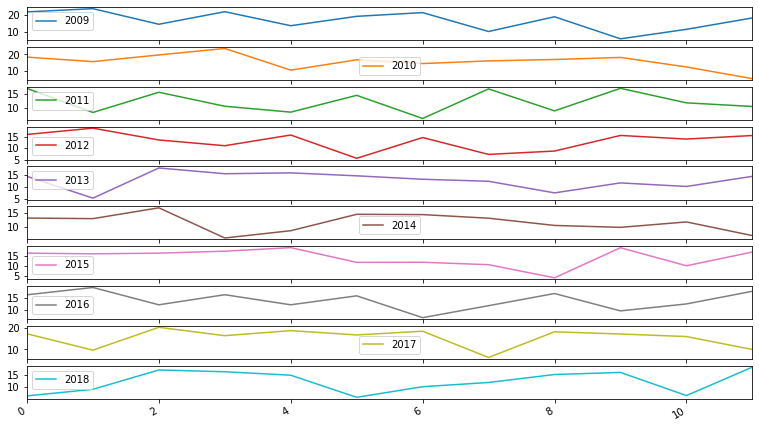

In [286]:
# year_groups = daily.groupby(pd.Grouper(freq ='A'))

#Create a new DataFrame and store yearly values in columns 
spc_annual = pd.DataFrame()
# yer=[]
# groop=[]
j=0
for yr, group in year_groups:
    if j<=9:
        spc_annual[yr.year]=group[:365].values.ravel()
    j+=1
#     print(group)
#     print(yr)
#     yer.append(yr)
#     groop.append(group)
# spc_annual[yer[3].year]=groop[3][:365].values.ravel()
# spc_annual[yer[0].year]=groop[0][:365].values.ravel()
# spc_annual[yer[1].year]=groop[1][:365].values.ravel()
# spc_annual[yer[2].year]=groop[2][:365].values.ravel()
# spc_annual[yer[5].year]=groop[5][:365].values.ravel()
# spc_annual[yer[4].year]=groop[4][:365].values.ravel()
# spc_annual[yer[6].year]=groop[6][:365].values.ravel()
# spc_annual[yer[7].year]=groop[7][:365].values.ravel()
# spc_annual[yer[8].year]=groop[8][:365].values.ravel()
# spc_annual[yer[9].year]=groop[9][:365].values.ravel()



# spc_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
spc_annual.plot(figsize = (13,8), subplots=True, legend=True);

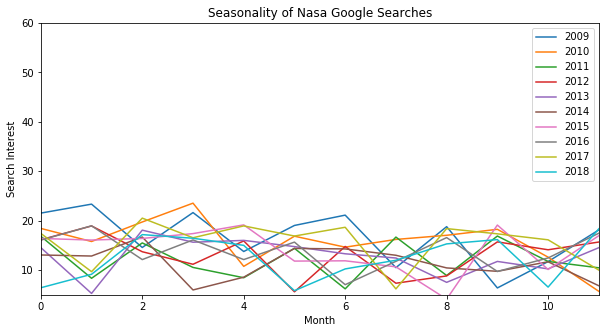

In [289]:
using='Nasa'
spc_annual.plot(figsize = (10,5), subplots=False, legend=True);
plt.ylabel('Search Interest')
plt.xlabel('Month')
plt.ylim(top=60,bottom=5)
plt.title('Seasonality of {} Google Searches'.format(using))
plt.show()

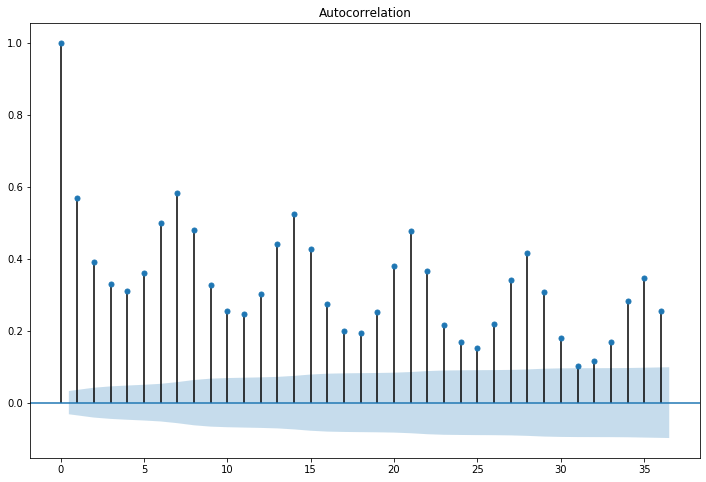

In [266]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot()
#plot the ACF
fig = sm.graphics.tsa.plot_acf(explore['space exploration'].iloc[1:], ax=ax1)


In [14]:
explore['space exploration']

date
2009-01-01     0.00
2009-01-02    40.88
2009-01-03    25.76
2009-01-04     0.00
2009-01-05    53.20
              ...  
2019-01-27    16.24
2019-01-28    30.24
2019-01-29    48.72
2019-01-30    44.80
2019-01-31    46.48
Name: space exploration, Length: 3683, dtype: float64

In [14]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

TypeError: float() argument must be a string or a number, not 'Period'

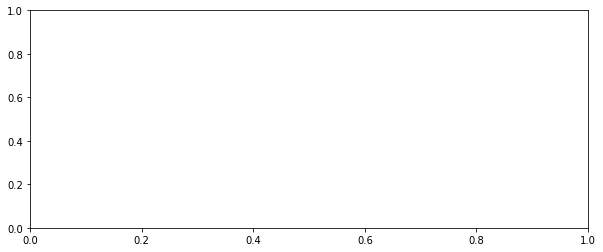

In [16]:
# Import passengers.csv and set it as a time-series object. Plot the TS
ts = explore['space exploration']
# ts = data.set_index('Month')
# ts.index = pd.to_datetime(ts.index)

ts.plot(figsize=(10,4), color="blue");

In [145]:
p = q = range(0, 4)
pdq = list(itertools.product(p, [1], q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, [1], q))]
print('Examples of parameter for SARIMA...')
for i in pdq:
    for s in seasonal_pdq:
        print('SARIMAX: {} x {}'.format(i, s))

Examples of parameter for SARIMA...
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 2, 12)
SARIMAX: (0, 1, 0) x (0, 1, 3, 12)
SARIMAX: (0, 1, 0) x (1, 1, 0, 12)
SARIMAX: (0, 1, 0) x (1, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 1, 2, 12)
SARIMAX: (0, 1, 0) x (1, 1, 3, 12)
SARIMAX: (0, 1, 0) x (2, 1, 0, 12)
SARIMAX: (0, 1, 0) x (2, 1, 1, 12)
SARIMAX: (0, 1, 0) x (2, 1, 2, 12)
SARIMAX: (0, 1, 0) x (2, 1, 3, 12)
SARIMAX: (0, 1, 0) x (3, 1, 0, 12)
SARIMAX: (0, 1, 0) x (3, 1, 1, 12)
SARIMAX: (0, 1, 0) x (3, 1, 2, 12)
SARIMAX: (0, 1, 0) x (3, 1, 3, 12)
SARIMAX: (0, 1, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 1) x (0, 1, 3, 12)
SARIMAX: (0, 1, 1) x (1, 1, 0, 12)
SARIMAX: (0, 1, 1) x (1, 1, 1, 12)
SARIMAX: (0, 1, 1) x (1, 1, 2, 12)
SARIMAX: (0, 1, 1) x (1, 1, 3, 12)
SARIMAX: (0, 1, 1) x (2, 1, 0, 12)
SARIMAX: (0, 1, 1) x (2, 1, 1, 12)
SARIMAX: (0, 1, 1) x (2, 1, 2, 12)
SARIMAX: (0, 1, 1) 

In [146]:
y=explore['space exploration']
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:33467.54770499823
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:30553.2941553182
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:30388.618982386826
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:30269.34511961313
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:32166.179882818287
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:30509.17898031421
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:30388.100235233618
ARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:30267.572061230043
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:31399.864798912367
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:30397.377090387105
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:30390.245589656097
ARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:30269.475471888225
ARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:30929.771084513326
ARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:30269.648830137936
ARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:30279.855090928988
ARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:30056.411368114957
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:32360.390613571977
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:29502.0141930473

ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:30876.35896361655
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:29198.312150090016
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:29078.78881480328
ARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:28941.408133139186
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:30057.80777525033
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:29051.840711313787
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:29044.144628668375
ARIMA(2, 1, 1)x(2, 1, 3, 12)12 - AIC:28531.203741697016
ARIMA(2, 1, 1)x(3, 1, 0, 12)12 - AIC:29529.818859634324
ARIMA(2, 1, 1)x(3, 1, 1, 12)12 - AIC:28910.91600018382
ARIMA(2, 1, 1)x(3, 1, 2, 12)12 - AIC:28926.90966878772
ARIMA(2, 1, 1)x(3, 1, 3, 12)12 - AIC:28525.616624390736
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:31763.00621311534
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:29128.71296817057
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:28969.84201279028
ARIMA(2, 1, 2)x(0, 1, 3, 12)12 - AIC:28858.217365060387
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:30826.457250186722
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:29086.336030263912


In [156]:
strin.split('\n')[0]

'(0, 1, 0)x(0, 1, 0, '

In [160]:
vals=[]
aic=[]
for i in strin.split('\n'):
    vals.append(i.split('ARIMA')[1][0:20])
    aic.append(float(i.split('AIC:')[-1]))
print(min(aic))

28278.37742489842


In [147]:
strin='''ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:33467.54770499823
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:30553.2941553182
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:30388.618982386826
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:30269.34511961313
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:32166.179882818287
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:30509.17898031421
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:30388.100235233618
ARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:30267.572061230043
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:31399.864798912367
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:30397.377090387105
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:30390.245589656097
ARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:30269.475471888225
ARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:30929.771084513326
ARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:30269.648830137936
ARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:30279.855090928988
ARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:30056.411368114957
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:32360.390613571977
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:29502.01419304735
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:29330.752865813072
ARIMA(0, 1, 1)x(0, 1, 3, 12)12 - AIC:29147.80046900814
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:31456.06098317844
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:29460.726163181043
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:29312.519977034506
ARIMA(0, 1, 1)x(1, 1, 3, 12)12 - AIC:29128.45126634599
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:30291.26715211674
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:29227.425338818124
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:29265.102067259497
ARIMA(0, 1, 1)x(2, 1, 3, 12)12 - AIC:28910.476315389606
ARIMA(0, 1, 1)x(3, 1, 0, 12)12 - AIC:29664.35581103091
ARIMA(0, 1, 1)x(3, 1, 1, 12)12 - AIC:29080.27014728134
ARIMA(0, 1, 1)x(3, 1, 2, 12)12 - AIC:29078.896399317433
ARIMA(0, 1, 1)x(3, 1, 3, 12)12 - AIC:28598.606244768343
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:31909.882305516963
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:29233.775087319606
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:29092.042263516625
ARIMA(0, 1, 2)x(0, 1, 3, 12)12 - AIC:28953.662818171906
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:30955.271963163304
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:29207.121555668586
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:29085.996160451
ARIMA(0, 1, 2)x(1, 1, 3, 12)12 - AIC:28944.39399124178
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:30087.18572883292
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:29076.99274797603
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:29045.379514895303
ARIMA(0, 1, 2)x(2, 1, 3, 12)12 - AIC:28525.260138955855
ARIMA(0, 1, 2)x(3, 1, 0, 12)12 - AIC:29558.967881993034
ARIMA(0, 1, 2)x(3, 1, 1, 12)12 - AIC:28937.50556156116
ARIMA(0, 1, 2)x(3, 1, 2, 12)12 - AIC:28952.737619548323
ARIMA(0, 1, 2)x(3, 1, 3, 12)12 - AIC:28513.245560583448
ARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:31899.258773637906
ARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:29224.879717754025
ARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:29082.927300888467
ARIMA(0, 1, 3)x(0, 1, 3, 12)12 - AIC:28948.652431093615
ARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:30893.57774497327
ARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:29197.642203307663
ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:29078.559848365257
ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:28938.829466974697
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:30089.050357967237
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:29078.861241172286
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:29038.15477115439
ARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC:28506.843513664557
ARIMA(0, 1, 3)x(3, 1, 0, 12)12 - AIC:29558.134179374705
ARIMA(0, 1, 3)x(3, 1, 1, 12)12 - AIC:28939.110895708967
ARIMA(0, 1, 3)x(3, 1, 2, 12)12 - AIC:28940.96226190285
ARIMA(0, 1, 3)x(3, 1, 3, 12)12 - AIC:28510.263528406173
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:33210.92268014701
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:30230.45680834854
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:30048.39172891879
ARIMA(1, 1, 0)x(0, 1, 3, 12)12 - AIC:29905.726749367783
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:32007.29197101621
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:30177.16411740384
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:30040.74276630281
ARIMA(1, 1, 0)x(1, 1, 3, 12)12 - AIC:29892.408544172933
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:31067.738007774144
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:30001.81548380886
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:29997.566855102254
ARIMA(1, 1, 0)x(2, 1, 3, 12)12 - AIC:29483.829108690305
ARIMA(1, 1, 0)x(3, 1, 0, 12)12 - AIC:30464.527314717183
ARIMA(1, 1, 0)x(3, 1, 1, 12)12 - AIC:29864.332327065225
ARIMA(1, 1, 0)x(3, 1, 2, 12)12 - AIC:29866.21254668959
ARIMA(1, 1, 0)x(3, 1, 3, 12)12 - AIC:29520.585495243336
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:31956.409780868562
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:29268.536061054674
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:29121.438551932348
ARIMA(1, 1, 1)x(0, 1, 3, 12)12 - AIC:28980.10280628868
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:30932.329387638703
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:29237.64945626088
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:29114.532489559333
ARIMA(1, 1, 1)x(1, 1, 3, 12)12 - AIC:28970.496765829892
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:30103.25093104109
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:29086.263515388935
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:29070.81356921995
ARIMA(1, 1, 1)x(2, 1, 3, 12)12 - AIC:28543.97784984982
ARIMA(1, 1, 1)x(3, 1, 0, 12)12 - AIC:29559.881139993886
ARIMA(1, 1, 1)x(3, 1, 1, 12)12 - AIC:28944.8901183473
ARIMA(1, 1, 1)x(3, 1, 2, 12)12 - AIC:28960.690574037737
ARIMA(1, 1, 1)x(3, 1, 3, 12)12 - AIC:28530.129424862804
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:31908.541835265783
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:29234.994645074883
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:29093.385583809388
ARIMA(1, 1, 2)x(0, 1, 3, 12)12 - AIC:28955.608834118764
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:30900.294021917496
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:29208.240316765423
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:29087.53295850061
ARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:28946.38993953343
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:30081.367402144868
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:29070.795145226613
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:29047.167154516792
ARIMA(1, 1, 2)x(2, 1, 3, 12)12 - AIC:28520.81330756873
ARIMA(1, 1, 2)x(3, 1, 0, 12)12 - AIC:29545.458423818684
ARIMA(1, 1, 2)x(3, 1, 1, 12)12 - AIC:28929.59423463166
ARIMA(1, 1, 2)x(3, 1, 2, 12)12 - AIC:28944.503423188457
ARIMA(1, 1, 2)x(3, 1, 3, 12)12 - AIC:28520.784928029952
ARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:31905.070025675355
ARIMA(1, 1, 3)x(0, 1, 1, 12)12 - AIC:29203.229238749635
ARIMA(1, 1, 3)x(0, 1, 2, 12)12 - AIC:29040.716697519725
ARIMA(1, 1, 3)x(0, 1, 3, 12)12 - AIC:28912.245908345532
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:30887.49199512398
ARIMA(1, 1, 3)x(1, 1, 1, 12)12 - AIC:29217.510873926323
ARIMA(1, 1, 3)x(1, 1, 2, 12)12 - AIC:29036.781830714994
ARIMA(1, 1, 3)x(1, 1, 3, 12)12 - AIC:28901.948143687856
ARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:30061.63923781854
ARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:29032.107538998327
ARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC:29001.952911255183
ARIMA(1, 1, 3)x(2, 1, 3, 12)12 - AIC:28515.838638811307
ARIMA(1, 1, 3)x(3, 1, 0, 12)12 - AIC:29519.33634887627
ARIMA(1, 1, 3)x(3, 1, 1, 12)12 - AIC:28894.242015309486
ARIMA(1, 1, 3)x(3, 1, 2, 12)12 - AIC:28913.71555247822
ARIMA(1, 1, 3)x(3, 1, 3, 12)12 - AIC:28530.96986908173
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:32916.06719838657
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:30010.92328238119
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:29841.25113769206
ARIMA(2, 1, 0)x(0, 1, 3, 12)12 - AIC:29662.075276908385
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:31858.518762753814
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:29962.673497820262
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:29825.333590663235
ARIMA(2, 1, 0)x(1, 1, 3, 12)12 - AIC:29640.981691729758
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:30787.785846516108
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:29714.971359970983
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:29701.67630724371
ARIMA(2, 1, 0)x(2, 1, 3, 12)12 - AIC:29099.28114305743
ARIMA(2, 1, 0)x(3, 1, 0, 12)12 - AIC:30121.356313073222
ARIMA(2, 1, 0)x(3, 1, 1, 12)12 - AIC:29568.15745807359
ARIMA(2, 1, 0)x(3, 1, 2, 12)12 - AIC:29564.74685198292
ARIMA(2, 1, 0)x(3, 1, 3, 12)12 - AIC:29129.372380684938
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:31909.23559111436
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:29224.576008866352
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:29083.041188604115
ARIMA(2, 1, 1)x(0, 1, 3, 12)12 - AIC:28949.298185471296
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:30876.35896361655
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:29198.312150090016
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:29078.78881480328
ARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:28941.408133139186
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:30057.80777525033
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:29051.840711313787
ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:29044.144628668375
ARIMA(2, 1, 1)x(2, 1, 3, 12)12 - AIC:28531.203741697016
ARIMA(2, 1, 1)x(3, 1, 0, 12)12 - AIC:29529.818859634324
ARIMA(2, 1, 1)x(3, 1, 1, 12)12 - AIC:28910.91600018382
ARIMA(2, 1, 1)x(3, 1, 2, 12)12 - AIC:28926.90966878772
ARIMA(2, 1, 1)x(3, 1, 3, 12)12 - AIC:28525.616624390736
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:31763.00621311534
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:29128.71296817057
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:28969.84201279028
ARIMA(2, 1, 2)x(0, 1, 3, 12)12 - AIC:28858.217365060387
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:30826.457250186722
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:29086.336030263912
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:29001.75180896745
ARIMA(2, 1, 2)x(1, 1, 3, 12)12 - AIC:28955.171331483692
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:30035.53457646048
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:28974.646442257363
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:28979.701385419416
ARIMA(2, 1, 2)x(2, 1, 3, 12)12 - AIC:28523.387046276453
ARIMA(2, 1, 2)x(3, 1, 0, 12)12 - AIC:29522.210316274373
ARIMA(2, 1, 2)x(3, 1, 1, 12)12 - AIC:28937.579501771128
ARIMA(2, 1, 2)x(3, 1, 2, 12)12 - AIC:28933.39929067036
ARIMA(2, 1, 2)x(3, 1, 3, 12)12 - AIC:28625.437094083623
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:31283.962344499152
ARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:29090.64280453962
ARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:28441.160077278397
ARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:28628.427545121336
ARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:29888.185391325227
ARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:28641.08744272212
ARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:28423.410754703604
ARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:28702.923385259994
ARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:29387.317306093635
ARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:29064.887747234265
ARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:28585.38760382407
ARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:28520.72023214836
ARIMA(2, 1, 3)x(3, 1, 0, 12)12 - AIC:29156.020180570144
ARIMA(2, 1, 3)x(3, 1, 1, 12)12 - AIC:28385.741281282157
ARIMA(2, 1, 3)x(3, 1, 2, 12)12 - AIC:28938.186608526914
ARIMA(2, 1, 3)x(3, 1, 3, 12)12 - AIC:28751.71888317455
ARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:32770.10929143429
ARIMA(3, 1, 0)x(0, 1, 1, 12)12 - AIC:29871.290644349538
ARIMA(3, 1, 0)x(0, 1, 2, 12)12 - AIC:29698.13726658754
ARIMA(3, 1, 0)x(0, 1, 3, 12)12 - AIC:29528.075435425446
ARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:31654.596580274017
ARIMA(3, 1, 0)x(1, 1, 1, 12)12 - AIC:29809.782612300638
ARIMA(3, 1, 0)x(1, 1, 2, 12)12 - AIC:29685.11450290437
ARIMA(3, 1, 0)x(1, 1, 3, 12)12 - AIC:29507.917438996556
ARIMA(3, 1, 0)x(2, 1, 0, 12)12 - AIC:30629.489991971663
ARIMA(3, 1, 0)x(2, 1, 1, 12)12 - AIC:29576.7359082512
ARIMA(3, 1, 0)x(2, 1, 2, 12)12 - AIC:29562.64927878131
ARIMA(3, 1, 0)x(2, 1, 3, 12)12 - AIC:29134.603794478688
ARIMA(3, 1, 0)x(3, 1, 0, 12)12 - AIC:29952.702648756334
ARIMA(3, 1, 0)x(3, 1, 1, 12)12 - AIC:29421.722568768586
ARIMA(3, 1, 0)x(3, 1, 2, 12)12 - AIC:29416.22807540537
ARIMA(3, 1, 0)x(3, 1, 3, 12)12 - AIC:28864.80420475583
ARIMA(3, 1, 1)x(0, 1, 0, 12)12 - AIC:31897.13747432838
ARIMA(3, 1, 1)x(0, 1, 1, 12)12 - AIC:29176.250653493065
ARIMA(3, 1, 1)x(0, 1, 2, 12)12 - AIC:29026.603767586348
ARIMA(3, 1, 1)x(0, 1, 3, 12)12 - AIC:28908.355361054917
ARIMA(3, 1, 1)x(1, 1, 0, 12)12 - AIC:30739.084105906943
ARIMA(3, 1, 1)x(1, 1, 1, 12)12 - AIC:29131.79155825157
ARIMA(3, 1, 1)x(1, 1, 2, 12)12 - AIC:29026.333616379557
ARIMA(3, 1, 1)x(1, 1, 3, 12)12 - AIC:28905.40854926177
ARIMA(3, 1, 1)x(2, 1, 0, 12)12 - AIC:30007.31859036256
ARIMA(3, 1, 1)x(2, 1, 1, 12)12 - AIC:29012.295359002615
ARIMA(3, 1, 1)x(2, 1, 2, 12)12 - AIC:29008.127033155688
ARIMA(3, 1, 1)x(2, 1, 3, 12)12 - AIC:28850.247204314845
ARIMA(3, 1, 1)x(3, 1, 0, 12)12 - AIC:29512.14525659709
ARIMA(3, 1, 1)x(3, 1, 1, 12)12 - AIC:28875.16468033968
ARIMA(3, 1, 1)x(3, 1, 2, 12)12 - AIC:28877.154679372274
ARIMA(3, 1, 1)x(3, 1, 3, 12)12 - AIC:28522.911678260512
ARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:31748.25291425115
ARIMA(3, 1, 2)x(0, 1, 1, 12)12 - AIC:29075.82726542245
ARIMA(3, 1, 2)x(0, 1, 2, 12)12 - AIC:28924.737331340475
ARIMA(3, 1, 2)x(0, 1, 3, 12)12 - AIC:28815.02585677865
ARIMA(3, 1, 2)x(1, 1, 0, 12)12 - AIC:30484.806006360006
ARIMA(3, 1, 2)x(1, 1, 1, 12)12 - AIC:29035.09884632488
ARIMA(3, 1, 2)x(1, 1, 2, 12)12 - AIC:28936.631124734842
ARIMA(3, 1, 2)x(1, 1, 3, 12)12 - AIC:28815.72019691423
ARIMA(3, 1, 2)x(2, 1, 0, 12)12 - AIC:29908.070651345482
ARIMA(3, 1, 2)x(2, 1, 1, 12)12 - AIC:28928.12929842375
ARIMA(3, 1, 2)x(2, 1, 2, 12)12 - AIC:28929.382408523223
ARIMA(3, 1, 2)x(2, 1, 3, 12)12 - AIC:28893.37475717195
ARIMA(3, 1, 2)x(3, 1, 0, 12)12 - AIC:29470.657641046182
ARIMA(3, 1, 2)x(3, 1, 1, 12)12 - AIC:28800.359678323068
ARIMA(3, 1, 2)x(3, 1, 2, 12)12 - AIC:28909.038295201535
ARIMA(3, 1, 2)x(3, 1, 3, 12)12 - AIC:28520.92398400662
ARIMA(3, 1, 3)x(0, 1, 0, 12)12 - AIC:31308.765785298543
ARIMA(3, 1, 3)x(0, 1, 1, 12)12 - AIC:29164.70301389339
ARIMA(3, 1, 3)x(0, 1, 2, 12)12 - AIC:28422.53168306328
ARIMA(3, 1, 3)x(0, 1, 3, 12)12 - AIC:28290.956054004495
ARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:29912.396896962804
ARIMA(3, 1, 3)x(1, 1, 1, 12)12 - AIC:28619.372642419636
ARIMA(3, 1, 3)x(1, 1, 2, 12)12 - AIC:28426.20544573467
ARIMA(3, 1, 3)x(1, 1, 3, 12)12 - AIC:28372.26460453291
ARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:29403.44656247455
ARIMA(3, 1, 3)x(2, 1, 1, 12)12 - AIC:28982.49719695134
ARIMA(3, 1, 3)x(2, 1, 2, 12)12 - AIC:28647.410473103417
ARIMA(3, 1, 3)x(2, 1, 3, 12)12 - AIC:28313.483226982622
ARIMA(3, 1, 3)x(3, 1, 0, 12)12 - AIC:29185.030792050515
ARIMA(3, 1, 3)x(3, 1, 1, 12)12 - AIC:28329.3125316995
ARIMA(3, 1, 3)x(3, 1, 2, 12)12 - AIC:28314.728905474403
ARIMA(3, 1, 3)x(3, 1, 3, 12)12 - AIC:28278.37742489842'''

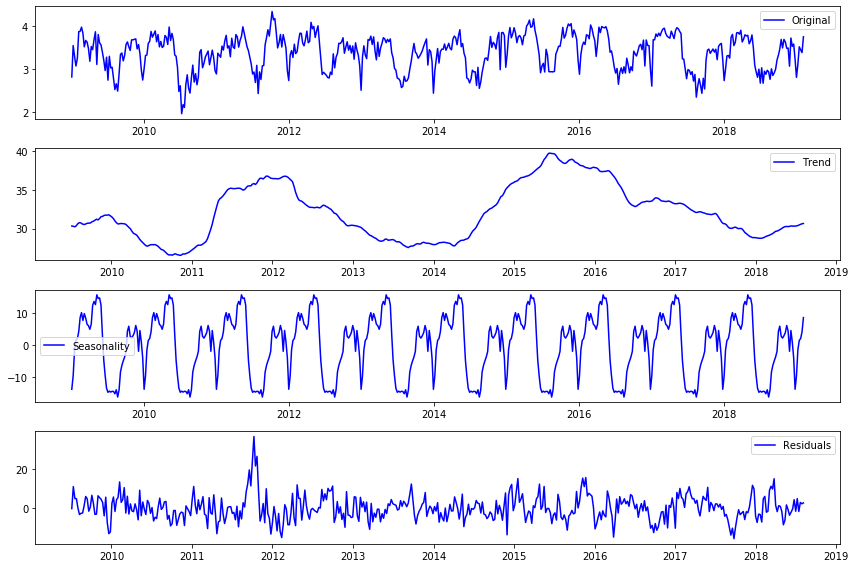

In [317]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
ts = explore['space exploration'].resample('W',how='mean')
# ts = nasa['nasa'].resample('M',how='mean')
# ts = marscol['mars colonization'].resample('M').mean()


decomposition = seasonal_decompose(ts)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

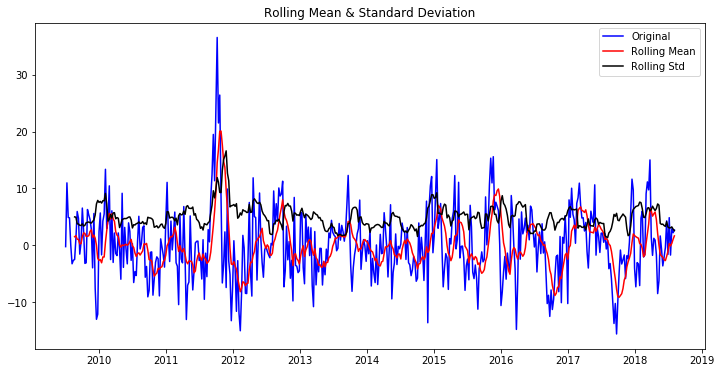

Results of Dickey-Fuller Test:
Test Statistic                -7.288354e+00
p-value                        1.438904e-10
#Lags Used                     5.000000e+00
Number of Observations Used    4.690000e+02
Critical Value (1%)           -3.444370e+00
Critical Value (5%)           -2.867722e+00
Critical Value (10%)          -2.570063e+00
dtype: float64


In [318]:
# Drop NaN values from residuals.
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

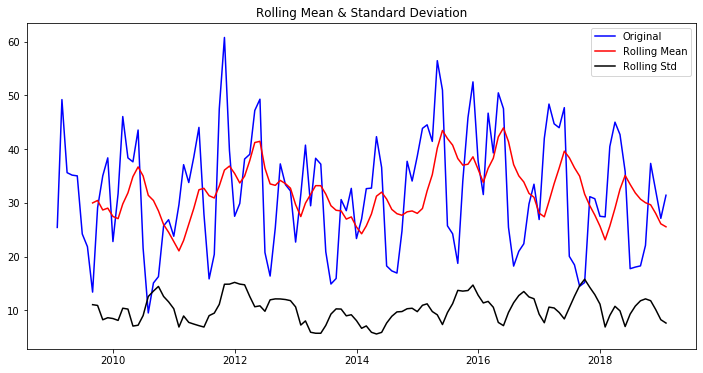

Results of Dickey-Fuller Test:
Test Statistic                  -2.022118
p-value                          0.276960
#Lags Used                      12.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64


In [142]:
stationarity_check(explore['space exploration'].resample('M',how='mean'))

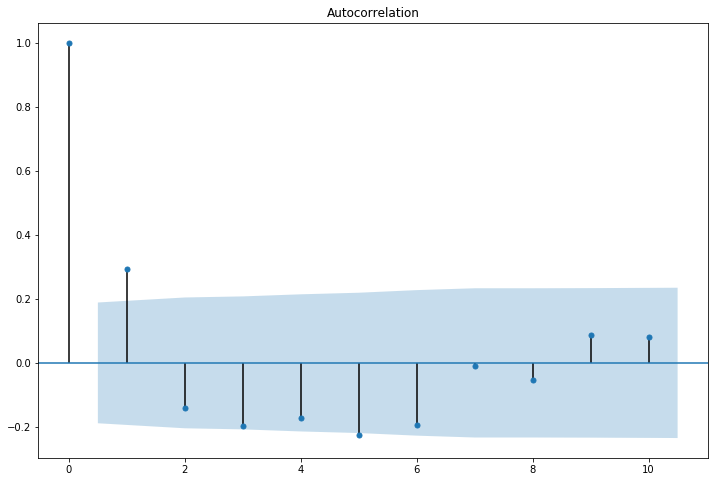

In [144]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot()
#plot the ACF
fig = sm.graphics.tsa.plot_acf(ts_log_decompose.iloc[1:],lags=10, ax=ax1)

In [131]:
months=ts_log_decompose

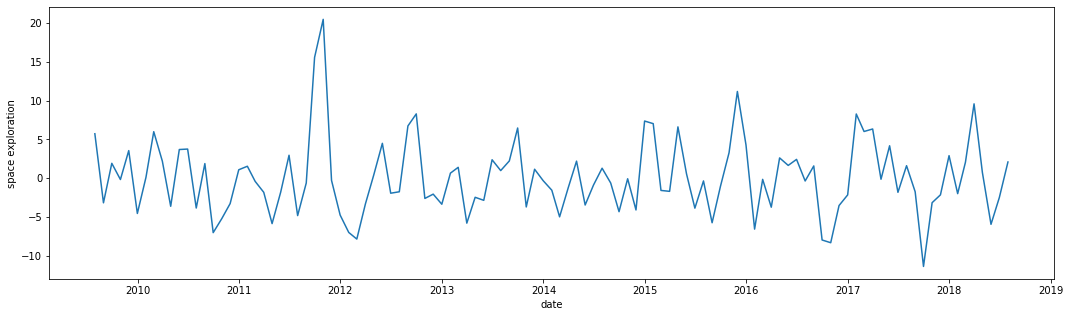

In [132]:
# pd.plotting.deregister_matplotlib_converters()
plt.figure(figsize=(18,5))
sns.lineplot(months.index,months[:])

plt.show()

In [ ]:
y=photos['space photos']

In [320]:
y=ts_log_decompose

In [307]:
y=explore['space exploration'].resample('M',how='mean')

In [321]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5003      0.037     13.679      0.000       0.429       0.572
ma.L1         -1.0000     39.738     -0.025      0.980     -78.886      76.886
ar.S.L12      -0.0002      0.023     -0.010      0.992      -0.045       0.044
ma.S.L12      -1.0000     89.395     -0.011      0.991    -176.210     174.210
sigma2        30.8519   2876.356      0.011      0.991   -5606.702    5668.406


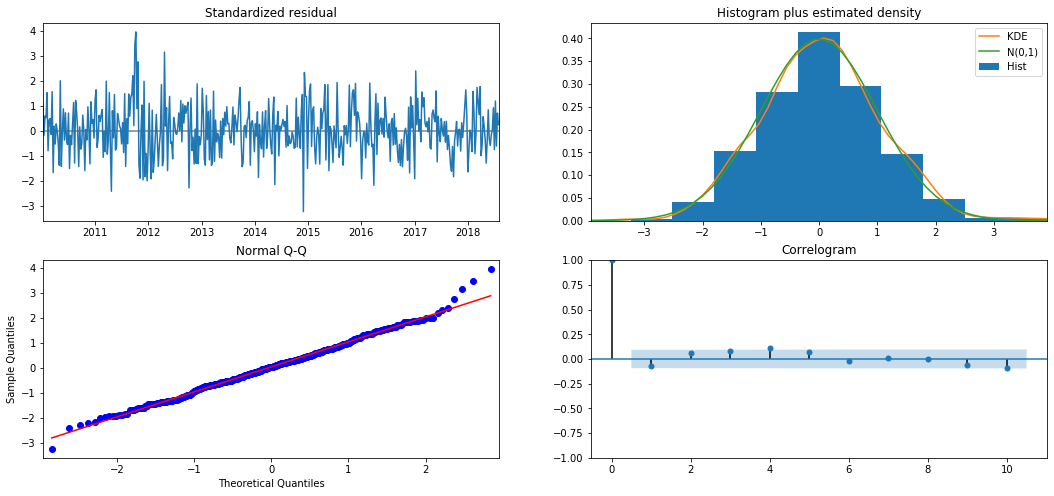

In [322]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [326]:
y.tail(55)

date
2017-07-23     2.024463
2017-07-30    -0.660544
2017-08-06     0.859788
2017-08-13    -4.131749
2017-08-20    -3.226346
2017-08-27    -5.908536
2017-09-03    -9.988820
2017-09-10   -13.781563
2017-09-17   -10.259654
2017-09-24   -15.631957
2017-10-01    -9.736217
2017-10-08    -4.819548
2017-10-15    -0.846310
2017-10-22    -3.306445
2017-10-29    -2.553253
2017-11-05    -1.713671
2017-11-12    -5.863779
2017-11-19    -1.853158
2017-11-26    -2.382550
2017-12-03     0.516989
2017-12-10     5.779440
2017-12-17    11.640243
2017-12-24     9.734516
2017-12-31    -4.041026
2018-01-07    -7.326909
2018-01-14    -3.063683
2018-01-21    -3.301290
2018-01-28    -7.108043
2018-02-04     4.755206
2018-02-11     5.985644
2018-02-18    -2.069799
2018-02-25    -1.664098
2018-03-04     9.073306
2018-03-11    11.158109
2018-03-18     9.746457
2018-03-25    15.023680
2018-04-01     1.464344
2018-04-08    -1.787155
2018-04-15     1.219353
2018-04-22     0.899762
2018-04-29    -1.674736
2018-05-06 

In [333]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-07'), dynamic=False, full_results=True)

In [334]:
pred_ci = pred.conf_int()

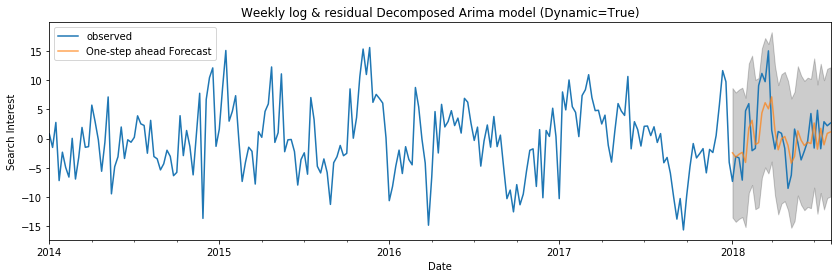

In [337]:
ax = y['2014':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Search Interest')
plt.title('Weekly log & residual Decomposed Arima model (Dynamic=True)')
# plt.ylim(0,100)
# plt.xlim((2018,2019))
plt.legend()
plt.show()

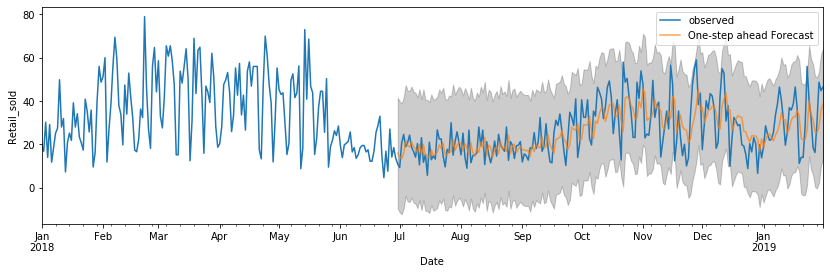

In [82]:
ax = explore['space exploration']['2018':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()